# Database Management (CREATE DB, INSERTING, QUERING)


In [114]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser
from matplotlib import style

In [136]:
def barplot(feature, value, title,df ,size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size, 8))
    g = sns.barplot(df[feature],df[value],palette="Set3")
    g.set_title("{}".format(title))
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.show

In [141]:
def lineplot(feature, value, title, df, size=1):
    f, ax = plt.subplots(1, 1, figsize=(4 * size, 4))
    g = sns.lineplot(df[feature], df[value], palette='Set3')
    g.set_title("Number of {}".format(title))
    plt.draw()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

# Import Data in dataframe format: 

In [115]:
df = pd.read_csv("costumerdata.csv")

df.head()


,date,part,company,country,city,price,date.1,Price_euro,id
0,2016-01-02 00:01:05,54868-5165,Chatterbridge,Spain,Barcelona,784.79€,2016-01-02 00:01:05,784.79,0
1,2016-01-02 00:05:26,60505-2867,Lajo,Greece,Thessaloniki,187.99€,2016-01-02 00:05:26,187.99,1
2,2016-01-02 00:18:30,24385-268,Flipstorm,Greece,Athens,221.73€,2016-01-02 00:18:30,221.73,2
3,2016-01-02 02:32:30,76117-001,Twitterbeat,France,Annecy,1075.82€,2016-01-02 02:32:30,1075.82,3
4,2016-01-02 04:51:55,44946-1046,Chatterbridge,Spain,Barcelona,412.55€,2016-01-02 04:51:55,412.55,4


In [117]:
df.info()

df_new = df.drop(["date.1", "price"], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20543 entries, 0 to 20542
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        20543 non-null  object 
 1   part        20543 non-null  object 
 2   company     20543 non-null  object 
 3   country     20543 non-null  object 
 4   city        20543 non-null  object 
 5   price       20543 non-null  object 
 6   date.1      20543 non-null  object 
 7   Price_euro  20543 non-null  float64
 8   id          20543 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 1.4+ MB


# CREATE DB:

## Create Connection

In [118]:
def create_connection(db_file):

    conn = None

    try:
        conn = sqlite3.connect(db_file)
        return conn

    except Error as e:
        print(e)

    return (conn)

## Create Table:

In [119]:
def create_table(conn, table_sql):

    try:
        c = conn.cursor()
        c.execute(table_sql)
    except Error as e:
        print(e)

## Insert item in clients table:

In [120]:
def create_item_client(conn, item):
    sql = """
    
    INSERT INTO clients(name,country,city)
    VALUES(?,?,?)"""

    c = conn.cursor()
    c.execute(sql, item)
    return c.lastrowid

## Insert item in transaction table:

In [121]:
def create_item_transactions(conn, item):
    sql = """
    
    INSERT INTO transactions(number,product,amount,date,company)
    VALUES(?,?,?,?,?)"""

    c = conn.cursor()
    c.execute(sql, item)
    return c.lastrowid

## Create tables

In [122]:
database = "costumer.db"

conn = create_connection(database)

sql_clients = """ CREATE TABLE clients (name text PRIMARY KEY,
                                        country text,
                                        city text);"""

sql_transaction = """ CREATE TABLE transactions (number text PRIMARY KEY,
                                                product text,
                                                amount double,
                                                date date,
                                                company text,
                                                FOREIGN KEY (company) REFERENCES clients (name))

"""


create_table(conn, sql_clients)

create_table(conn, sql_transaction)
conn.commit()
conn.close()

## Inserting client items:

In [123]:
database = "costumer.db"
conn = create_connection(database)
df_company = df_new.drop_duplicates('company')
for index, row in df_company.iterrows():
    client_command = (row['company'], row['country'], row['city'])
    client_id = create_item_client(conn, client_command)
    
conn.commit()
conn.close()

## Inserting transactions items:

In [125]:
database = "costumer.db"
conn = create_connection(database)
for index, row in df_new.iterrows():
    transaction_command = (row['id'], row['part'], row['Price_euro'],
                           row['date'], row['company'])
    transaction_id = create_item_transactions(conn, transaction_command)
conn.commit()
conn.close()

## Querying sum sells per company:

In [126]:
database = "costumer.db"

conn = create_connection(database)

c = conn.cursor()
c.execute(
    "SELECT * FROM (SELECT company, SUM(amount) AS amount FROM transactions GROUP BY company) ORDER BY amount DESC"
)

rows = c.fetchall()
for row in rows:
    print(row)
print(len(rows))

('Thoughtmix', 1626805.1600000015)
('Twitterbeat', 1325104.0200000033)
('Zooxo', 998668.6800647781)
('Shufflebeat', 922924.7199999999)
('Chatterbridge', 921110.8999999994)
('Ntags', 846252.5499999991)
('Brainsphere', 720802.9399999991)
('Buzzbean', 713758.4299999992)
('Flipstorm', 673246.2099999991)
('Wordify', 535510.4807126565)
('Yozio', 368655.4100000002)
('Roodel', 362089.7599999997)
('Eimbee', 295001.94999999984)
('Zoonder', 263428.6677016085)
('Teklist', 241354.28)
('Gabcube', 204489.94999999998)
('Voomm', 144799.98)
('Avaveo', 126505.0700000001)
('Lajo', 122119.52999999997)
('Rhycero', 112883.34000000004)
('Riffpath', 90550.25000000007)
('Realpoint', 85333.36999999995)
('Kanoodle', 72615.43307126626)
('Bubblemix', 27476.052162117077)
('Innojam', 25539.63)
('Gevee', 22549.16)
('Gabtune', 18359.269999999997)
('Tagtune', 6579.640000000001)
28


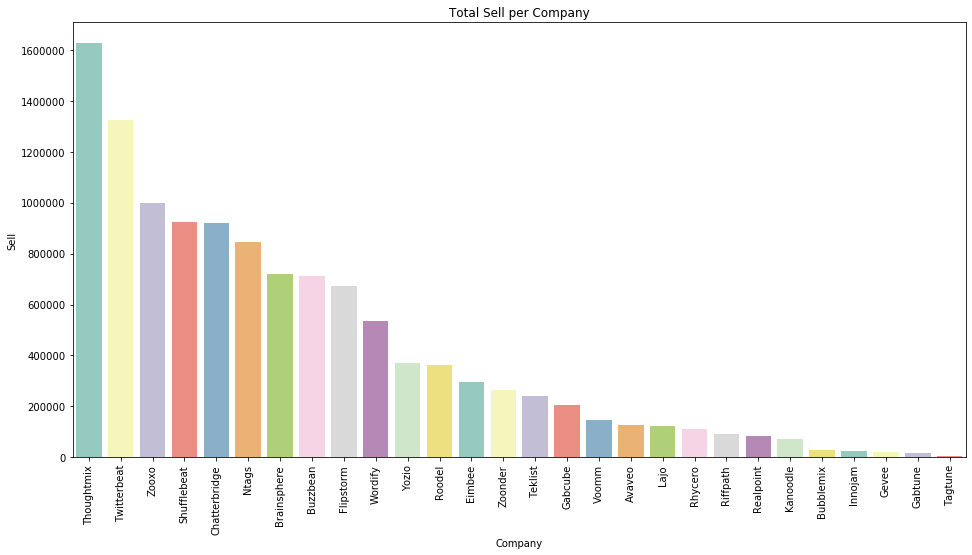

In [138]:
df_sell_per_comp = pd.DataFrame(rows, columns=["Company", "Sell"])
barplot('Company', 'Sell', "Total Sell per Company",df_sell_per_comp,size=4)

## Company Tagtune Purchase per Month

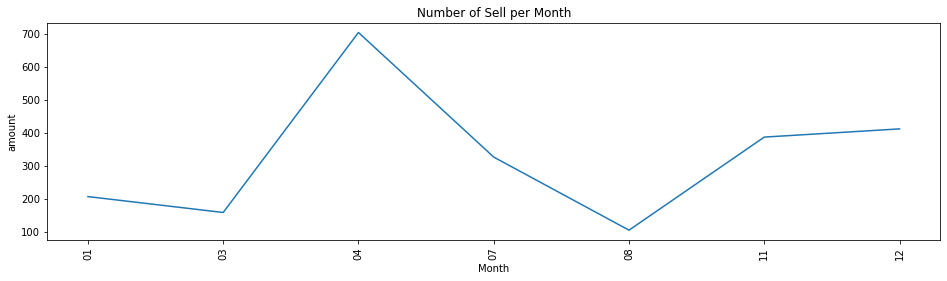

In [143]:
database = "costumer.db"

conn = create_connection(database)

c = conn.cursor()
c.execute(
    "SELECT month, amount FROM (SELECT strftime('%m', date) as month, amount FROM transactions WHERE company='Tagtune' ORDER BY date ASC) GROUP BY month"
)

rows=c.fetchall()
sell_per_m_tt = pd.DataFrame(rows,columns=['Month', "amount"])

lineplot("Month","amount", "Sell per Month", sell_per_m_tt,size=4)

In [145]:
database = "costumer.db"

conn = create_connection(database)


c = conn.cursor()
c.execute(
    "SELECT * FROM transactions WHERE company='Yozio' AND date>='2018-12-23' AND date<='2018-12-26'"
)

rows = c.fetchall()
for row in rows:
    print(row)
print(len(rows))




('17133', '49349-471', 833.06, '2018-12-23 00:26:23', 'Yozio')
('17134', '51523-002', 731.64, '2018-12-23 01:21:39', 'Yozio')
('17149', '48951-4042', 207.71, '2018-12-23 23:11:47', 'Yozio')
('17179', '48951-4042', 61.59, '2018-12-25 22:01:58', 'Yozio')
4


In [146]:
database = "costumer.db"

conn = create_connection(database)



c = conn.cursor()
c.execute("SELECT * FROM transactions ORDER BY date DESC LIMIT 10")

rows = c.fetchall()
for row in rows:
    print(row)
print(len(rows))

('17265', '43419-018', 139.56, '2019-05-14 22:48:39', 'Flipstorm')
('17264', '49288-0285', 1051.08, '2019-02-21 20:05:00', 'Flipstorm')
('17263', '52343-025', 686.1, '2018-12-31 21:38:02', 'Brainsphere')
('17262', '49999-737', 828.37, '2018-12-31 21:24:17', 'Thoughtmix')
('17261', '21695-267', 606.37, '2018-12-31 20:48:14', 'Roodel')
('17260', '68462-565', 882.52, '2018-12-31 19:56:53', 'Shufflebeat')
('17259', '98132-889', 179.88, '2018-12-31 18:24:51', 'Yozio')
('17258', '36987-1697', 1017.44, '2018-12-31 16:46:06', 'Chatterbridge')
('17257', '36800-952', 286.23, '2018-12-31 16:27:34', 'Gabcube')
('17256', '13537-259', 762.29, '2018-12-31 14:17:24', 'Thoughtmix')
10


In [147]:
database = "costumer.db"

conn = create_connection(database)

c = conn.cursor()
c.execute(
    "SELECT company,DATE(date), SUM(amount) FROM transactions GROUP BY company,DATE(date)"
)

rows = c.fetchall()
for row in rows[0:10]:
    print(row)
print(len(rows))


('Avaveo', '2016-01-03', 1029.92)
('Avaveo', '2016-01-06', 687.63)
('Avaveo', '2016-01-18', 358.46)
('Avaveo', '2016-01-19', 474.35)
('Avaveo', '2016-02-01', 138.41)
('Avaveo', '2016-02-11', 732.99)
('Avaveo', '2016-02-20', 750.87)
('Avaveo', '2016-03-07', 383.81)
('Avaveo', '2016-03-08', 878.69)
('Avaveo', '2016-03-18', 499.3)
11681


In [113]:
conn.close()